In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [60]:
os.getcwd()

'/work-ceph/bizer-tp2021/data_integration_using_deep_learning/notebooks/Entity/LocalBusiness'

In [8]:
# import data
source_path = r"../../../src/data/LocalBusiness"
#source_path = r"C:\Users\chench10\Downloads" 
file = r"19-12-21_MatchingFile"

df = pd.read_json(os.path.join(source_path, file), compression='gzip', orient='records', lines=True) 

In [9]:
df.head()

,index,row_id,origin,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,phone_object,E.164 format,telephoneNorm,telephone_
0,53.0,2,LocalBusiness_litmind.com_September2020.json.gz,Salvador Model Agency,"{'postalcode': '28001', 'addresslocality': 'Ma...",https://es.litmind.com/salvadormodelagency,+34 914310707,Madrid,"General Pardiñas, 34. 1º7ª",Madrid,ES,-3.6835849285126,40.423894105042,"{'country_code': 34, 'extension': None, 'natio...",3.491431e+10,3.491431e+10,NaN
1,56.0,5,LocalBusiness_litmind.com_September2020.json.gz,EFTI - Centro Internacional de Fotografía y Cine,None,https://www.litmind.com/eftimasterfotografiamo...,+34 915529999,None,None,None,None,None,None,"{'country_code': 34, 'extension': None, 'natio...",3.491553e+10,3.491553e+10,NaN
2,58.0,7,LocalBusiness_litmind.com_September2020.json.gz,Black&amp;berry Models,None,https://www.litmind.com/blackandberrymodels,+34 666819078,None,None,None,None,None,None,"{'country_code': 34, 'extension': None, 'natio...",3.466682e+10,3.466682e+10,NaN
3,60.0,9,LocalBusiness_litmind.com_September2020.json.gz,Nomade MNGT,None,https://es.litmind.com/nomade.mngt,+54 1143611490,None,None,None,None,None,None,"{'country_code': 54, 'extension': None, 'natio...",5.411436e+11,5.411436e+11,NaN
4,61.0,10,LocalBusiness_litmind.com_September2020.json.gz,UNIC AZAFATAS S.L,"{'postalcode': '28250', 'addresscountry': 'ES'...",https://es.litmind.com/456459,+34 918599376,Madrid,C/ TORRENCINA 18,TORRELODONES,ES,-3.8939949,40.5808292,"{'country_code': 34, 'extension': None, 'natio...",3.491860e+10,3.491860e+10,NaN


In [10]:
# df.groupby('origin').size().sort_values(asce)

origin
Hotel_10best.com_September2020.json.gz                   213
Hotel_1589hotels.com_September2020.json.gz                16
Hotel_1stquest.com_September2020.json.gz                 230
Hotel_360degreesgroup.com_September2020.json.gz            2
Hotel_4ehotels.com_September2020.json.gz                   3
                                                        ... 
Restaurant_zenchef.com_September2020.json.gz             239
Restaurant_zenwok-restaurant.fr_September2020.json.gz     38
Restaurant_zhupiter.com_September2020.json.gz              8
Restaurant_zoup.com_September2020.json.gz                 70
Restaurant_zueriplausch.ch_September2020.json.gz           7
Length: 11077, dtype: int64

In [10]:
df_copy = df.copy()

<b> Before cleaning </b> <br>
number of unique tables: 11k <br>
number of unique clusters: 963k

### Cluster Cleaning

In [11]:
df =df_copy.copy()

<b> step 1: </b> Group the data by <i>telephoneNorm</i>, and count the number of tables for each group, keep only the groups with records from at least two tables

In [14]:
tmp = pd.DataFrame(df.groupby('telephoneNorm')['origin'].nunique()).reset_index()
tmp.columns = ['telephoneNorm','Ntables']

In [15]:
df_merge = df.merge(tmp, on='telephoneNorm', how='left')
df1 = df_merge[df_merge['Ntables']>1]
#df1 = df_merge[df_merge['Ntables']>0]

In [17]:
df1

,index,row_id,origin,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,phone_object,E.164 format,telephoneNorm,telephone_,Ntables
185,258.0,14,LocalBusiness_sushipointer.com_September2020.j...,Wok Sushi Star Restaurant - All you can eat Sa...,{'streetaddress': 'Münchner Bundesstraße 114B'...,https://sushipointer.com/places/austria/salzbu...,+43 662 421747,Salzburg,Münchner Bundesstraße 114B,Salzburg,Austria,13.0053973,47.8293872,"{'country_code': 43, 'extension': None, 'natio...",4.366242e+10,4.366242e+10,NaN,2
187,262.0,18,LocalBusiness_sushipointer.com_September2020.j...,L'wzaar Sea Food Restaurant Doha,"{'addresscountry': 'Qatar', 'addressregion': '...",https://sushipointer.com/places/qatar/doha/doh...,+974 4408 0710,Doha,"L'wzaar Sea Food Restaurant, Katara Street",Doha,Qatar,51.52650117874146,25.358588885959527,"{'country_code': 974, 'extension': None, 'nati...",9.744408e+10,9.744408e+10,NaN,2
191,267.0,23,LocalBusiness_sushipointer.com_September2020.j...,Kolala Asia Buffet Restaurant Salzburg,"{'addressregion': 'Salzburg', 'postalcode': '5...",https://sushipointer.com/places/austria/salzbu...,+43 662 825895,Salzburg,Karolingerstraße 1,Salzburg,Austria,13.0083900305072,47.7982038,"{'country_code': 43, 'extension': None, 'natio...",4.366283e+10,4.366283e+10,NaN,2
192,268.0,24,LocalBusiness_sushipointer.com_September2020.j...,KOI Restaurant Munich,"{'addresslocality': 'Munich', 'streetaddress':...",https://sushipointer.com/places/germany/bavari...,+49 89 89081926,Bavaria,Wittelsbacherplatz 1,Munich,Germany,11.5755376,48.1432179,"{'country_code': 49, 'extension': None, 'natio...",4.989891e+11,4.989891e+11,NaN,2
193,269.0,25,LocalBusiness_sushipointer.com_September2020.j...,Lucy Wang Innsbruck,"{'addresslocality': 'Innsbruck', 'addressregio...",https://sushipointer.com/places/austria/tyrol/...,+43 512 359091,Tyrol,"Erlerstraße, 17-19",Innsbruck,Austria,11.3961224,47.2651998,"{'country_code': 43, 'extension': None, 'natio...",4.351236e+10,4.351236e+10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808927,NaN,5167,Hotel_onthebeach.co.uk_September2020.json.gz,Garcia Resort and Spa,"Oludeniz, Fethiye/Mugla, Olu Deniz, Dalaman Area",https://www.onthebeach.co.uk/hotels/turkey/gar...,00902526167100,None,None,None,None,None,None,None,NaN,9.025262e+11,9.025262e+11,5
4808930,NaN,5170,Hotel_onthebeach.co.uk_September2020.json.gz,Villa Stanley,"Viale Xx Settembre, Florence",https://www.onthebeach.co.uk/hotels/italy/tusc...,39055446121,None,None,None,None,None,None,None,NaN,3.905545e+10,3.905545e+10,2
4808933,NaN,5173,Hotel_onthebeach.co.uk_September2020.json.gz,Tal Fanal and Ta Sbejha Villages,"11 Capuchins Street, Gozo",https://www.onthebeach.co.uk/hotels/malta/vict...,00356 215 57255,None,None,None,None,None,None,None,NaN,3.562156e+10,3.562156e+10,2
4808936,NaN,5179,Hotel_onthebeach.co.uk_September2020.json.gz,Victoria Palace,"Sunny Beach, Bourgas",https://www.onthebeach.co.uk/hotels/bulgaria/s...,35955425490,None,None,None,None,None,None,None,NaN,3.595543e+10,3.595543e+10,3


In [19]:
df1['origin'].nunique()
df1["telephoneNorm"].nunique()

222113

In [20]:
# Now check for min_size of 8

df1 = df_merge[df_merge['Ntables']>7]
print(df1['origin'].nunique())
print(df1["telephoneNorm"].nunique())

5092
7093


In [22]:
df1["telephoneNorm"].value_counts().sort_values()

8.135876e+10        8
5.696192e+10        8
4.869012e+10        8
4.934120e+11        8
6.129266e+10        8
                ...  
8.882057e+09     5237
3.519364e+11     5352
9.193139e+11     6938
1.888408e+10    14950
3.397220e+10    29080
Name: telephoneNorm, Length: 7093, dtype: int64

<b> After step1 </b> <br>
number of unique tables: 18.1k (5k last iteration) <br>
number of unique clusters: 222.1k (72.6k last iteration)

cluster size >= 8: <br>
number of unique tables: 5.1k (1.3k last iteration) <br>
number of unique clusters: 7.1k (1.3k last iteration)

In [23]:
df1.drop(columns='Ntables', inplace=True)

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<b> step 2: </b> Use more specific address information, e.g., <i>streetaddress</i>, for filtering 

In [24]:
def replace_list(iterator):
    if isinstance(iterator, list):
        return ' '.join(iterator)
    else:
        return iterator

In [25]:
df1['streetaddress']=df1['streetaddress'].apply(replace_list)
df1['addresslocality']=df1['addresslocality'].apply(replace_list)

df1["streetaddress"] = df1["streetaddress"].str.upper()
df1['addresslocality']=df1['addresslocality'].str.upper()

/tmp/ipykernel_215889/3160774378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['streetaddress']=df1['streetaddress'].apply(replace_list)
/tmp/ipykernel_215889/3160774378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['addresslocality']=df1['addresslocality'].apply(replace_list)
/tmp/ipykernel_215889/3160774378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [26]:
df1

,index,row_id,origin,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,phone_object,E.164 format,telephoneNorm,telephone_
441,606.0,362,LocalBusiness_sushipointer.com_September2020.j...,sho cho Japanese Restaurant & Lounge Dubai,"{'addressregion': 'Dubai', 'addresslocality': ...",https://sushipointer.com/places/united-arab-em...,+971 4 346 1111,Dubai,"DUBAI MARINE BEACH RESORT & SPA, U.A.E, 21 A, ...",DUBAI,United Arab Emirates,55.265307426452644,25.23930031044365,"{'country_code': 971, 'extension': None, 'nati...",9.714346e+10,9.714346e+10,NaN
504,686.0,443,LocalBusiness_sushipointer.com_September2020.j...,KIKU Traditional Japanese Restaurant Dubai,"{'addressregion': 'Dubai', 'streetaddress': 'D...",https://sushipointer.com/places/united-arab-em...,+971 4 702 2455,Dubai,DUBAI,DUBAI,United Arab Emirates,55.34654617309571,25.248965713111236,"{'country_code': 971, 'extension': None, 'nati...",9.714702e+10,9.714702e+10,NaN
1023,15695.0,73,LocalBusiness_visitthy.com_September2020.json.gz,Brænderiet Limfjorden,"{'postalcode': '7870', 'addresscountry': 'DK',...",https://www.visitthy.com/thy/plan-your-trip/br...,+45 40 94 00 00,None,SUNDSØREVEJ 4 SUNDSØRE HAVN,ROSLEV,DK,9.17325139045715E0,5.67080333615004E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,NaN
1209,16859.0,6,LocalBusiness_theecostrip.com_September2020.js...,Clé Tile,"{'addresscountry': 'US', 'postalcode': '94901'...",http://www.theecostrip.com/KcQVj.html,+1-415-887-9011,CA,2143 FRANCISCO BLVD E,SAN RAFAEL,US,None,None,"{'country_code': 1, 'extension': None, 'nation...",1.415888e+10,1.415888e+10,NaN
1805,20780.0,5,LocalBusiness_gamingamericas.com_September2020...,NETENT,None,https://gamingamericas.com/directory/listing/n...,+46 8 578 54 500,None,None,None,None,None,None,"{'country_code': 46, 'extension': None, 'natio...",4.685785e+10,4.685785e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808572,NaN,4499,Hotel_onthebeach.co.uk_September2020.json.gz,The Residences At Victoria,"Av dos Descobrimentos, Vilamoura, Algarve",https://www.onthebeach.co.uk/hotels/portugal/c...,351289317000,None,None,None,None,None,None,None,NaN,3.512893e+11,3.512893e+11
4808594,NaN,4539,Hotel_onthebeach.co.uk_September2020.json.gz,PortAventura Hotel PortAventura & Theme Park,"Av Alcalde Pere Molas s/n, Vila Seca, Salou - ...",https://www.onthebeach.co.uk/hotels/spain/cost...,0034977779090,None,None,None,None,None,None,None,NaN,3.497778e+10,3.497778e+10
4808615,NaN,4588,Hotel_onthebeach.co.uk_September2020.json.gz,Medplaya Hotel Balmoral,"Calle Albatros 1, Benalmadena, Costa del Sol",https://www.onthebeach.co.uk/hotels/spain/cost...,0034952443640,None,None,None,None,None,None,None,NaN,3.495244e+10,3.495244e+10
4808765,NaN,4867,Hotel_onthebeach.co.uk_September2020.json.gz,Anantara Vilamoura Algarve Resort (ex Tivoli V...,"Apartado 665, 8125, Vilamoura, Algarve",https://www.onthebeach.co.uk/hotels/portugal/c...,00351289317000,None,None,None,None,None,None,None,NaN,3.512893e+11,3.512893e+11


In [27]:
tmp1 = pd.DataFrame(df1.groupby('telephoneNorm')['streetaddress'].nunique()).reset_index()
tmp1.columns = ['telephoneNorm','Nstreetaddress']

tmp2 = pd.DataFrame(df1.groupby('telephoneNorm')['addresslocality'].nunique()).reset_index()
tmp2.columns = ['telephoneNorm','Naddresslocality']

In [28]:
df_merge = df1.merge(tmp1, on='telephoneNorm', how='left').merge(tmp2, on='telephoneNorm', how='left')
df2 = df_merge[(df_merge['Nstreetaddress']<=5) & (df_merge['Naddresslocality']<=5)]
df2.drop(columns=['Nstreetaddress','Naddresslocality'], inplace=True)

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
tmp_ = pd.DataFrame(df2.groupby('telephoneNorm')['origin'].nunique()).reset_index()
tmp_.columns = ['telephoneNorm','Ntables']
df_merge_ = df2.merge(tmp_, on='telephoneNorm', how='left')
df_ = df_merge_[df_merge_['Ntables']>=8]

In [34]:
print(df_["origin"].nunique())
print(df_["telephoneNorm"].nunique())

3647
6432


<b> After step2 </b> <br>
number of unique tables: 5.2k (OUTDATED) <br> 
number of unique clusters: 72.1k (OUTDATED)

cluster size >= 8: <br>
number of unique tables: 3.6k (last iteration 1.04k )<br>
number of unique clusters: 6.4k (last iteration 1.33k)

<b> step 3: </b>  Additional filtering using geo location

The function for calculating distances is credited to Marvin

In [44]:
# def calcDifference(pointOne, pointTwo):
#     return geopy.distance.great_circle(pointOne, pointTwo).km

# def calcDifferenceFromRow (row, data):
#     indexValue = row.indexValue
#     indexPosition = (row[lat], row[lon])
#     diffList = []
# #     for value in row['MatchingGeoPoints']:
# #         if not value in tmp.index:
# #             continue
#     for value in row['MatchingNumbers']:
#         currRow = data.loc[value]
#         currIndex = currRow['indexValue']
#         if currIndex == indexValue:
#             diffList.append(-1)
#         else:            
#             currPosition = (currRow[lat], currRow[lon])
#             diffList.append(calcDifference(indexPosition, currPosition))
#     return diffList


# def keepCloseMatches(row, threshold):
#     return np.array(row['MatchingNumbers'])[np.array(row['distance'])<=threshold]

In [45]:
# lat = 'latitude'
# lon = 'longitude'

# check_list = ['latitude', 'longitude', 'indexValue']
# for l in check_list:
#     df2[l]=df2[l].apply(replace_list)
# df2['distance'] = df2.apply(calcDifferenceFromRow, args=(df2, ), axis=1)

In [46]:
# df2_copy = df2.copy()
# df2['MatchingNumbers_New'] = df2.apply(keepCloseMatches, args=(0.05,), axis=1)

In [47]:
# df2.to_json('df2_backup', compression='gzip', orient='records', lines=True)

### Clusters
#### Cluster Statistics

In [138]:
# class EntityCluster():
#     """
#     create culsters and generate summary statistics for each entity tpye
#     """
    
#     def __init__(self, name, df=None, id_col='telephoneNorm'):
#         self.name = name
#         self.df = df
#         self.id_col = id_col
        
#         self._create_clusters()
        
#     @staticmethod
#     def _helperfunc(iterator, cluster, id_col='telephoneNorm', val_col='MatchingNumbers'):
#         key = iterator[id_col]
#         val = iterator[val_col]
#         cluster[key] = cluster[key].union(set(val))
        
#         return cluster
        
        
#     def _create_clusters(self):
#         """
#         create clusters and use the column value as the cluster identifier
#         """
#         df = self.df
#         id_col = self.id_col
        
#         # intialize the cluster
#         if not df is None:
#             cluster_ids = df[id_col].unique()
#             cluster = {key: set([]) for key in cluster_ids}
#             # add elements to the cluster
#             cluster = df.apply(EntityCluster._helperfunc, args=(cluster,), axis=1)[0]
#         else:
#             cluster = None
        
#         self.cluster = cluster
        
    
#     def get_cluster(self):
#         return self.cluster
                                                                            

#     def create_cluster_statistics(self, *args):
#         cluster = self.cluster
#         # create a dataframe for data storage
#         tmp = {}
#         for key, val in cluster.items():
#             tmp[key] = len(val)
            
#         df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
#         df_clusters.sort_values('frequency', ascending=False, inplace=True)
            
#         return df_clusters['frequency'].describe()
      
    
#     def plot_histogram(self, min_=None, max_=None, bins=None, *args): 
    
#         cluster = self.cluster
#         name =self.name
#         # create a dataframe for data storage
#         tmp = {}
#         for key, val in cluster.items():
#             tmp[key] = len(val)
            
#         df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
#         df_clusters.sort_values('frequency', ascending=False, inplace=True)
        
#         # plot the histogram
#         if min_ is None: 
#             min_ = df_clusters.frequency.quantile(0.95) 
#         if max_ is None: 
#             max_ = df_clusters.frequency.max()
#         if bins is None:
#             bins = int((max_ - min_)/10)
            
#         figure, ax= plt.subplots(figsize=(10,3))
#         subset = df_clusters[(df_clusters.frequency> min_)&(df_clusters.frequency< max_)].frequency
#         xint = range(math.floor(min_), math.ceil(max_)+1)
#         plt.xticks(xint)
#         plt.title(name)
#         plt.xlabel('Cluster Size')
#         plt.hist(subset, bins=bins)

In [140]:
# LocalBusiness = EntityCluster('Local Business', df_filtered)
# cluster_statistics_LB = LocalBusiness.create_cluster_statistics()
# cluster_plot_LB = LocalBusiness.plot_histogram(min_=0, max_=30, bins=30)

In [21]:
# cluster_statistics_LB

count    14004.000000
mean         2.892816
std          1.912312
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: frequency, dtype: float64

#### Distribution of Matching Entities over Tables 

In [36]:
df_filtered = df2.reset_index(drop=True)

In [37]:
# create a dataframe storing cluster ids
numbers = df_filtered['telephoneNorm'].unique()

dict_id = {}
i = 1
for number in numbers:
    dict_id[number] = i
    i += 1

tmp = pd.DataFrame.from_dict(dict_id, orient='index')
tmp.reset_index(inplace=True)
tmp.columns = ['telephoneNorm','cluster_id']

In [38]:
df_clean = df_filtered.merge(tmp, on='telephoneNorm')#[['cluster id','origin','row_id','page_url']]
#df_clean.columns = ['cluster_id','table_id','row_id','page_url']

In [39]:
#df_clean.to_json('MFile_cleaned', compression='gzip', orient='records', lines=True)

In [40]:
df_clean=df_clean.rename(columns={'origin':'table_id'})
df_clean

,index,row_id,table_id,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,phone_object,E.164 format,telephoneNorm,telephone_,cluster_id
0,15695.0,73,LocalBusiness_visitthy.com_September2020.json.gz,Brænderiet Limfjorden,"{'postalcode': '7870', 'addresscountry': 'DK',...",https://www.visitthy.com/thy/plan-your-trip/br...,+45 40 94 00 00,None,SUNDSØREVEJ 4 SUNDSØRE HAVN,ROSLEV,DK,9.17325139045715E0,5.67080333615004E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,NaN,1
1,1027462.0,90,LocalBusiness_visitthy.de_September2020.json.gz,Brænderiet Limfjorden,"{'postalcode': '7870', 'addresscountry': 'DK',...",https://www.visitthy.de/thy/planen-sie-ihre-re...,+45 40 94 00 00,None,SUNDSØREVEJ 4 SUNDSØRE HAVN,ROSLEV,DK,9.17325139045715E0,5.67080333615004E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,NaN,1
2,15622.0,0,LocalBusiness_visitthy.com_September2020.json.gz,Brænderiet Limfjorden - distillery,"{'streetaddress': 'Sundsørevej 4 null', 'posta...",https://www.visitthy.com/thy/plan-your-trip/br...,40940000,None,SUNDSØREVEJ 4 NULL,ROSLEV,DK,9.17321563E0,5.670806848E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,4.094000e+07,1
3,1134570.0,25,LocalBusiness_visitnordjylland.de_September202...,Brænderiet Limfjorden,"{'streetaddress': 'Sundsørevej 4 null', 'posta...",https://www.visitnordjylland.de/nordjuetland/p...,40940000,None,SUNDSØREVEJ 4 NULL,ROSLEV,DK,9.17324066162109E0,5.67083690397555E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,4.094000e+07,1
4,1594242.0,4,LocalBusiness_visitmors.com_September2020.json.gz,Brænderiet Limfjorden,"{'streetaddress': 'Sundsørevej 4 null', 'posta...",https://www.visitmors.com/mors/plan-your-trip/...,40940000,None,SUNDSØREVEJ 4 NULL,ROSLEV,DK,9.17324066162109E0,5.67083690397555E1,"{'country_code': 45, 'extension': None, 'natio...",4.540940e+09,4.540940e+09,4.094000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110001,NaN,101,Hotel_h-rzn.com_September2020.json.gz,Home ApartHotel,"Ul. Sw. Sebastiana 12, Krakow, 31-049, Poland",https://home-hotel-krakow.h-rzn.com/location.htm,"[US: 888-697-3791, EU: +800-8585-2345, UK: 080...",None,None,None,None,None,None,None,NaN,8.886974e+31,8.886974e+31,6432
110002,NaN,112,Hotel_h-rzn.com_September2020.json.gz,Hotel d'Angleterre Geneva,"Quai du Mont-Blanc 17, Geneva, 1201, Switzerland",https://hotel-dangleterre-geneva.h-rzn.com/loc...,"[US: 888-697-3791, EU: +800-8585-2345, UK: 080...",None,None,None,None,None,None,None,NaN,8.886974e+31,8.886974e+31,6432
110003,NaN,119,Hotel_h-rzn.com_September2020.json.gz,Steigenberger Grandhotel Handelshof Leipzig,"Salzgaesschen 6, Leipzig, 04109, Germany",https://steigenberger-grandhotel-handelshof-le...,"[US: 888-697-3791, EU: +800-8585-2345, UK: 080...",None,None,None,None,None,None,None,NaN,8.886974e+31,8.886974e+31,6432
110004,NaN,5,Hotel_lesfleursboutiquehotelsofia.com_Septembe...,Les Fleurs Boutique Hotel,"21 Vitosha Blvd, Sofia, 1000, Bulgaria",http://lesfleursboutiquehotelsofia.com/locatio...,"[US: 888-697-3791, EU: +800-8585-2345, UK: 080...",None,None,None,None,None,None,None,NaN,8.886974e+31,8.886974e+31,6432


In [41]:
tmp = pd.DataFrame(df_clean.groupby(['cluster_id'])['table_id'].nunique()).reset_index()
tmp.columns = ['cluster_id','clusterNtables']
df_final = df_clean.merge(tmp, on='cluster_id', how='left')

In [42]:
tmp = pd.DataFrame(df_final.groupby(['table_id'])['cluster_id'].nunique()).reset_index()
tmp.columns = ['table_id','tableNclusters']
df_final = df_final.merge(tmp, on='table_id', how='left').sort_values(by='tableNclusters', ascending=False)

In [43]:
df_final.sort_values('clusterNtables')

,index,row_id,table_id,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,phone_object,E.164 format,telephoneNorm,telephone_,cluster_id,clusterNtables,tableNclusters
44443,4347309.0,2150,LocalBusiness_homify.ua_September2020.json.gz,dekoratorka.pl,"{'streetaddress': 'ul.Gwarna 13/61d', 'address...",https://www.homify.ua/projects/156294/tulce-mi...,+48-604683978,None,UL.GWARNA 13/61D,POZNAŃ,Польща,1.69214069E1,5.24081244E1,"{'country_code': 48, 'extension': None, 'natio...",4.860468e+10,4.860468e+10,NaN,2969,8,1558
61031,155926.0,5,LocalBusiness_websnoop.org_September2020.json.gz,Air McCall Inc.,"{'addresslocality': 'Jacksonville', 'addressre...",https://www.websnoop.org/detail/3658/ac-instal...,(904) 288-6110,FL,6662 COLUMBIA PARK DR. S SUITE 1,JACKSONVILLE,US,None,None,"{'country_code': 1, 'extension': None, 'nation...",1.904289e+10,1.904289e+10,9.042886e+09,4154,8,6
70416,2079521.0,10,LocalBusiness_marlaneufeld.com_September2020.j...,Lawyer Services of LA,"{'addresscountry': 'US', 'streetaddress': '382...",https://marlaneufeld.com/business-attorney-gle...,1-310-525-0435,CA,3827 OCEANVIEW BLVD,MONTROSE,US,None,None,"{'country_code': 1, 'extension': None, 'nation...",1.310525e+10,1.310525e+10,1.310525e+10,4756,8,6
70419,3426428.0,4,LocalBusiness_clarklawgroupny.com_September202...,Lawyer Services of LA,"{'addresslocality': 'Suite 100 Glendale', 'add...",https://www.clarklawgroupny.com/uber-accident-...,1-310-525-0435,CA,3455 OCEAN VIEW BLVD.,SUITE 100 GLENDALE,US,None,None,"{'country_code': 1, 'extension': None, 'nation...",1.310525e+10,1.310525e+10,1.310525e+10,4756,8,6
88100,NaN,150,LocalBusiness_wiredsites.org_September2020.jso...,American Construction & Remodeling,"{'addresslocality': 'Happy Valley,', 'addressc...",https://www.wiredsites.org/detail/19454/americ...,503-265-9793,"OR,","13349 SE TUMBLEWEED CT,","HAPPY VALLEY,","USA,",None,None,None,NaN,5.032660e+09,5.032660e+09,6011,8,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101051,NaN,8,Hotel_cedarlodgehotel-elportal.com_September20...,Cedar Lodge,"9966 Highway 140, El Portal, 95318, CA, Verein...",http://cedarlodgehotel-elportal.com/rooms_de.htm,888-205-7322,None,None,None,None,None,None,None,NaN,8.882057e+09,8.882057e+09,6423,318,2
101053,NaN,10,Hotel_cedarlodgehotel-elportal.com_September20...,Cedar Lodge,"9966 Highway 140, El Portal, 95318, CA, USA",http://cedarlodgehotel-elportal.com/rooms_sv.htm,888-205-7322,None,None,None,None,None,None,None,NaN,8.882057e+09,8.882057e+09,6423,318,2
99187,NaN,292,Hotel_hotel-rez.com_September2020.json.gz,NORFOLK TOWERS PADDINGTON,"34 Norfolk Place, London, United Kingdom, W2 1QW",https://norfolktowers.hotel-rez.com/index_sv.htm,888-205-7322,None,None,None,None,None,None,None,NaN,8.882057e+09,8.882057e+09,6423,318,5
101054,NaN,11,Hotel_cedarlodgehotel-elportal.com_September20...,Cedar Lodge,"9966 Highway 140, El Portal, 95318, CA, Amerik...",http://cedarlodgehotel-elportal.com/rooms_da.htm,888-205-7322,None,None,None,None,None,None,None,NaN,8.882057e+09,8.882057e+09,6423,318,2


In [54]:
print(df_final["telephoneNorm"].nunique())
df_final["table_id"].nunique()

6432


3647

In [58]:
# convert telephoneNorm to int64 for further processsingb
df_final["telephoneNorm"] = df_final["telephoneNorm"].astype(np.int64)

In [62]:
file = '20-12-21_ClusterFile_withCleaning'
destination_path = r"../../../src/data/LocalBusiness"
df_final.to_json(os.path.join(destination_path, '{}'.format(file)), compression='gzip', orient='records', lines=True)

/tmp/ipykernel_644278/4064157574.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_cluster =df_final.drop_duplicates('cluster_id', keep='first')[df_final['clusterNtables']>=8]


Text(0, 0.5, 'number of clusters')

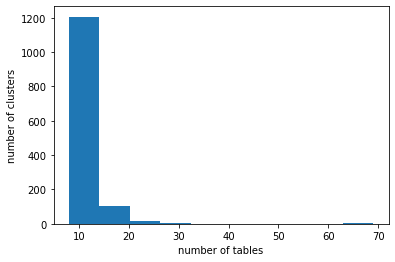

In [48]:
unique_cluster =df_final.drop_duplicates('cluster_id', keep='first')[df_final['clusterNtables']>=8]
plt.hist(unique_cluster['clusterNtables'], bins=10)
plt.xlabel('number of tables')
plt.ylabel('number of clusters')

/tmp/ipykernel_644278/927170451.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_table =df_final.drop_duplicates('table_id', keep='first')[df_final['clusterNtables']>=8][['table_id', 'tableNclusters']]


Text(0, 0.5, 'number of tables')

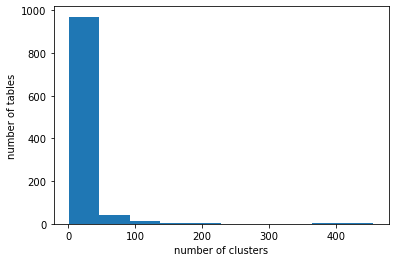

In [49]:
unique_table =df_final.drop_duplicates('table_id', keep='first')[df_final['clusterNtables']>=8][['table_id', 'tableNclusters']]

plt.hist(unique_table['tableNclusters'])
plt.xlabel('number of clusters')
plt.ylabel('number of tables')